In [1]:
import json

# import numpy as np
import pandas as pd
import numpy as np

import yfinance as yf

# plotting
import plotnine as pn
from plotnine import ggplot, aes, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous

## Instatiate IG Service

In [3]:
GOLD_TICKER = "GC=F"
gold = yf.Ticker(GOLD_TICKER)
MSFT_TICKER = "msft"
msft = yf.Ticker(MSFT_TICKER)



In [4]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2022-04-27 10:30:55,Wolfe Research,Outperform,,main
2022-04-27 11:39:41,Deutsche Bank,Buy,,main
2022-04-27 11:42:42,Stifel,Buy,,main


In [98]:
gold.info

{'exchange': 'CMX',
 'shortName': 'Gold Aug 22',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'underlyingSymbol': 'GCQ22.CMX',
 'quoteType': 'FUTURE',
 'symbol': 'GC=F',
 'underlyingExchangeSymbol': 'GCQ22.CMX',
 'headSymbol': 'GC=F',
 'market': 'us24_market',
 'previousClose': 1857.3,
 'regularMarketOpen': 1856.5,
 'twoHundredDayAverage': 1838.96,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 1867.9,
 'navPrice': None,
 'averageDailyVolume10Day': 24767,
 'totalAssets': None,
 'regularMarketPreviousClose': 1857.3,
 'fiftyDayAverage': 1899.288,
 'trailingAnnualDividendRate': None,
 'open': 1856.5,
 'toCurrency': None,
 'averageVolume10days': 24767,
 'expireDate': 1661731200,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regul

In [101]:
gold.actions

,Dividends,Stock Splits
Date,,


In [102]:
history_raw = gold.history()
# history_raw.to_csv('tmp/history_raw.csv')

In [112]:
history = history_raw.reset_index().assign(
    days_since=lambda df: list(map(lambda x: x.days, (df["Date"] - df["Date"][0])))
)
history.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,days_since
0,2022-05-02,1896.699951,1896.800049,1853.000000,1861.800049,385,0,0,0
1,2022-05-03,1868.800049,1868.800049,1868.800049,1868.800049,466,0,0,1
2,2022-05-04,1867.000000,1867.000000,1867.000000,1867.000000,1,0,0,2
3,2022-05-05,1897.000000,1904.300049,1874.000000,1874.000000,80,0,0,3
4,2022-05-06,1874.699951,1890.300049,1871.500000,1881.199951,214,0,0,4


In [152]:
test_size = 3
history = history.assign(
    train_test=["train"] * (len(history) - test_size) + ["test"] * test_size
)


In [153]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [154]:
train = history.query("train_test=='train'")
test = history.query("train_test=='test'")
X_train = train.days_since.to_numpy().reshape(-1,1)
X_test = test.days_since.to_numpy().reshape(-1,1)
y_train = train.Close
y_test = test.Close

In [155]:
from sklearn.preprocessing import PolynomialFeatures
polys = PolynomialFeatures(degree=3)
polys.fit(X_train)
X_train_preprocessed = polys.transform(X_train)

In [156]:
mod = LinearRegression()
mod.fit(X_train_preprocessed,y_train)

LinearRegression()

In [157]:
polys.transform(X_test)

array([[1.0000e+00, 2.4000e+01, 5.7600e+02, 1.3824e+04],
       [1.0000e+00, 2.5000e+01, 6.2500e+02, 1.5625e+04],
       [1.0000e+00, 2.8000e+01, 7.8400e+02, 2.1952e+04]])

In [158]:
y_predictions = mod.predict(polys.transform(X_test))
y_predictions

array([1879.54946167, 1896.05104189, 1961.5275576 ])

In [159]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predictions, y_test)

4234.851960693423

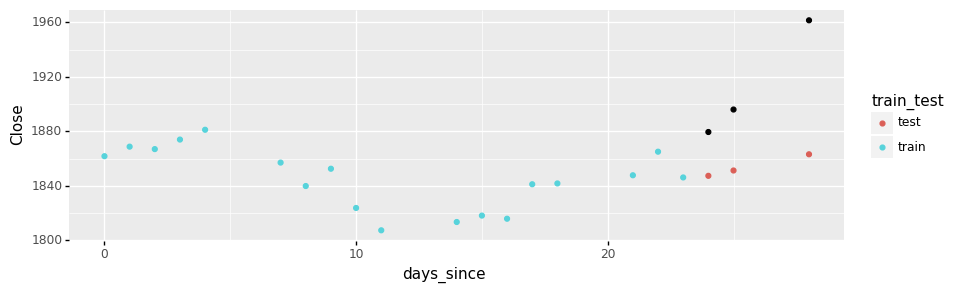

<ggplot: (318395895)>

In [160]:
(
    ggplot(history)+
    geom_point(aes('days_since','Close',color = 'train_test'))+
    theme(figure_size = [10,3])+
    pn.geom_point(data = test,mapping = aes('days_since',y_predictions))
)

In [172]:
if y_predictions[0]> y_test.iloc[-1]:
    # implement buying logic
    

True

In [114]:
# inputs = np.linspace(0,60,100)
# poly = PolynomialFeatures(degree = 2)
# inputs = poly.fit_transform(inputs.reshape(-1,1))

# poly = PolynomialFeatures(degree = 3)
# inputs = poly.fit_transform(inputs.reshape(-1,1))



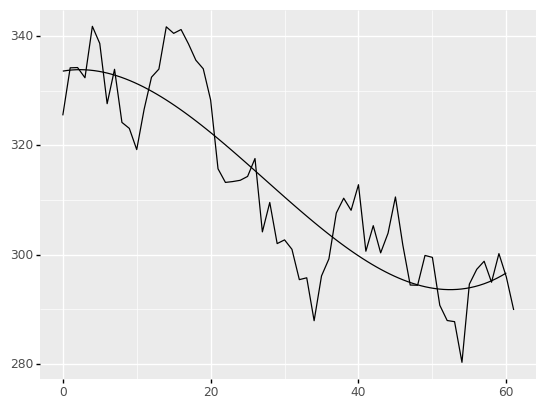

<ggplot: (306785818)>

In [145]:
def plot_model(model = linreg):
    inputs = np.linspace(0,60,100)
    inputs = poly.fit_transform(inputs.reshape(-1,1))

    preds= polyreg.predict(inputs)

    gg = (
        ggplot()+
        geom_line(aes(inputs[:,1],preds))+ # plot the model
        geom_line(aes(hist['index'],hist['Close']))
    )
    return gg

plot_model(polyreg)




In [42]:
linreg.predict(np.array([[1]]))

array([336.047157])

In [1]:
import boto3

In [2]:
s3_client = boto3.client('s3')

In [4]:

s3_resource = boto3.resource('s3')

In [10]:
for bucket in s3_resource.buckets.all():
    print(bucket.name)

test-bucket31


In [12]:
mybucket = s3_resource.Bucket('test-bucket31')

In [13]:
for my_bucket_object in mybucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='test-bucket31', key='Screenshot 2022-02-06 at 21.11.56.png')
s3.ObjectSummary(bucket_name='test-bucket31', key='wage.csv')


In [19]:
s3_resource.Object('test-bucket31', 'wage.csv').download_file(
    f"tmp/{'wage.csv'}") # Python 3.6+s3_resource

In [20]:
open_positions = ig_service.fetch_open_positions()
print(f"open_positions:\n{open_positions}" )

open_positions:
Index(['size', 'high', 'updateTime', 'netChange', 'contractSize', 'delayTime',
       'currency', 'createdDateUTC', 'level', 'direction',
       'limitedRiskPremium', 'controlledRisk', 'instrumentName',
       'marketStatus', 'instrumentType', 'offer', 'createdDate', 'expiry',
       'bid', 'updateTimeUTC', 'trailingStopDistance', 'percentageChange',
       'limitLevel', 'dealReference', 'low', 'stopLevel', 'trailingStep',
       'scalingFactor', 'lotSize', 'dealId', 'epic',
       'streamingPricesAvailable'],
      dtype='object')
